In [8]:
import logging
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
plt.rcParams.update({'font.size': 22})

In [9]:
def load_log_file(file_name):
    # open the file
    with open(file_name, "r") as f:
        file_data = f.readlines()
    f.close()

    # extract the error data
    total_name_list = []
    total_sr_list = []
    total_spl_list = []
    for data in file_data:
        if 'mean success rate' in data:
            # save the mean success rate
            sr = eval(data.split('=')[1]) * 100
            total_sr_list.append(sr)
            
        if 'mean distance spl' in data:
            # save the mean distance spl
            spl = eval(data.split('=')[1]) * 100
            total_spl_list.append(spl)
            
        if 'Start evaluating' in data:
            # save the mean action spl
            name = data.split(" ")[3]
            total_name_list.append(name)
            
    return total_name_list, total_sr_list, total_spl_list

In [10]:
def load_log_file_per_episode(file_name):
    # open the file
    with open(file_name, "r") as f:
        file_data = f.readlines()
    f.close()

    # extract the error data
    total_name_list = []
    total_sr_list = []
    total_spl_list = []
    sr_list = []
    for data in file_data:
        # check if the episode is successful
        if "SUCCESS:)" in data:
            sr_list.append(1)
            
        if "FAIL:(" in data:
            sr_list.append(0)
            
        # reset the list if a new environment happens
        if "The mean success rate" in data:
            total_sr_list.append(sr_list)
            sr_list = []
            
    return total_name_list, total_sr_list, total_spl_list

In [11]:
def plot_bar_chart(name_list, data_list, configs):
    plt.rcParams.update({'font.size': configs['font_size']})
    # create the figure
    fig = plt.figure(figsize=(24, 16))
    
    # find the shortest data length
    min_len_list = [len(d) for d in data_list]
    min_len = min(min_len_list)
    min_len_idx = min_len_list.index(min_len)
    
    # compute the coordinates for each bar
    bar_num_per_unit = len(data_list)
    bar_width = 0.8 / bar_num_per_unit
    
    # compute the offset
    offset_list = np.linspace(0, 0.8, bar_num_per_unit+1) - (0.8 / 2)
    
    # plot the bar
    color_legend = {}
    for offset, n, d, c, l in zip(offset_list, name_list, data_list, configs['color'], configs['legend']):
        plt.bar(np.array(range(min_len)) + offset, d[0:min_len], color=c, width=bar_width, alpha=configs['alpha'])
        color_legend[l] = c
    plt.bar(name_list[min_len_idx], [0] * len(name_list[min_len_idx]))
        
    # set the figure configurations
    plt.yticks(np.linspace(0,100,21))  # set the intervals of the grid
    plt.grid("on", axis='y', linestyle = '--', linewidth = 2, color='k', alpha=0.7)  # draw dash lines 
    plt.ylim(configs['ylim_min'], configs['ylim_max'])
    plt.xlabel(configs['label_x'])
    plt.xticks(rotation=90)
    plt.ylabel(configs['label_y'])
    plt.title(configs['title'])
    
    # add legend         
    labels = list(color_legend.keys())
    handles = [plt.Rectangle((0,0),1,1, color=color_legend[label]) for label in labels]
    plt.legend(handles, labels, loc="lower right")
    plt.show()
    
    # print the statistcs information
    for d, l in zip(data_list, configs['legend']):
        print(f"{l} {configs['metric']} mean value = {np.round(np.mean(d), 2)} %, std = {np.round(np.std(d), 2)} %")

In [12]:
def plot_bar_chart(name_list, data_list, configs):
    plt.rcParams.update({'font.size': configs['font_size']})
    # create the figure
    fig = plt.figure(figsize=(24, 16))
    
    # find the shortest data length
    min_len_list = [len(d) for d in data_list]
    min_len = min(min_len_list)
    min_len_idx = min_len_list.index(min_len)
    
    # compute the coordinates for each bar
    bar_num_per_unit = len(data_list)
    bar_width = 0.8 / bar_num_per_unit
    
    # compute the offset
    offset_list = np.linspace(0, 0.8, bar_num_per_unit+1) - (0.8 / 2)
    
    # plot the bar
    color_legend = {}
    for offset, n, d, c, l in zip(offset_list, name_list, data_list, configs['color'], configs['legend']):
        plt.bar(np.array(range(min_len)) + offset, d[0:min_len], color=c, width=bar_width, alpha=configs['alpha'])
        color_legend[l] = c
    plt.bar(name_list[min_len_idx], [0] * len(name_list[min_len_idx]))
        
    # set the figure configurations
    plt.yticks(np.linspace(0,100,21))  # set the intervals of the grid
    plt.grid("on", axis='y', linestyle = '--', linewidth = 2, color='k', alpha=0.7)  # draw dash lines 
    plt.ylim(configs['ylim_min'], configs['ylim_max'])
    plt.xlabel(configs['label_x'])
    plt.xticks(rotation=90)
    plt.ylabel(configs['label_y'])
    plt.title(configs['title'])
    
    # add legend         
    labels = list(color_legend.keys())
    handles = [plt.Rectangle((0,0),1,1, color=color_legend[label]) for label in labels]
    plt.legend(handles, labels, loc="lower right")
    plt.show()
    
    # print the statistcs information
    for d, l in zip(data_list, configs['legend']):
        print(f"{l} {configs['metric']} mean value = {np.round(np.mean(d), 2)} %, std = {np.round(np.std(d), 2)} %")

# BL : implement by setting the parameters of CMN

[array([100. ,  96.7])]
[array([36. , 79.8])]


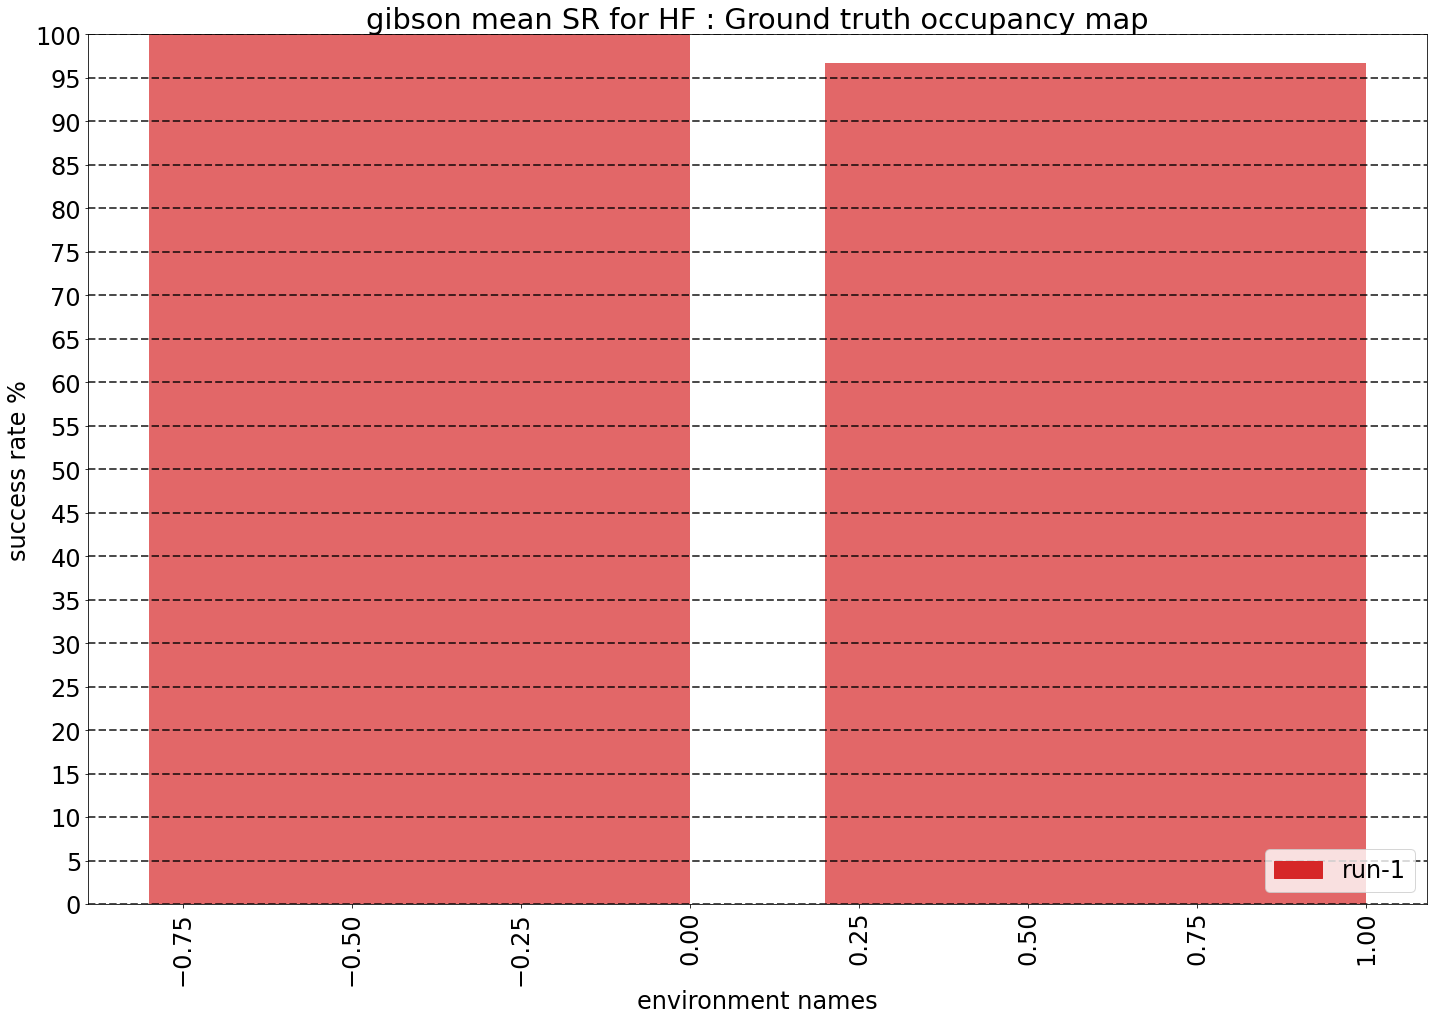

run-1 SR mean value = 98.35 %, std = 1.65 %


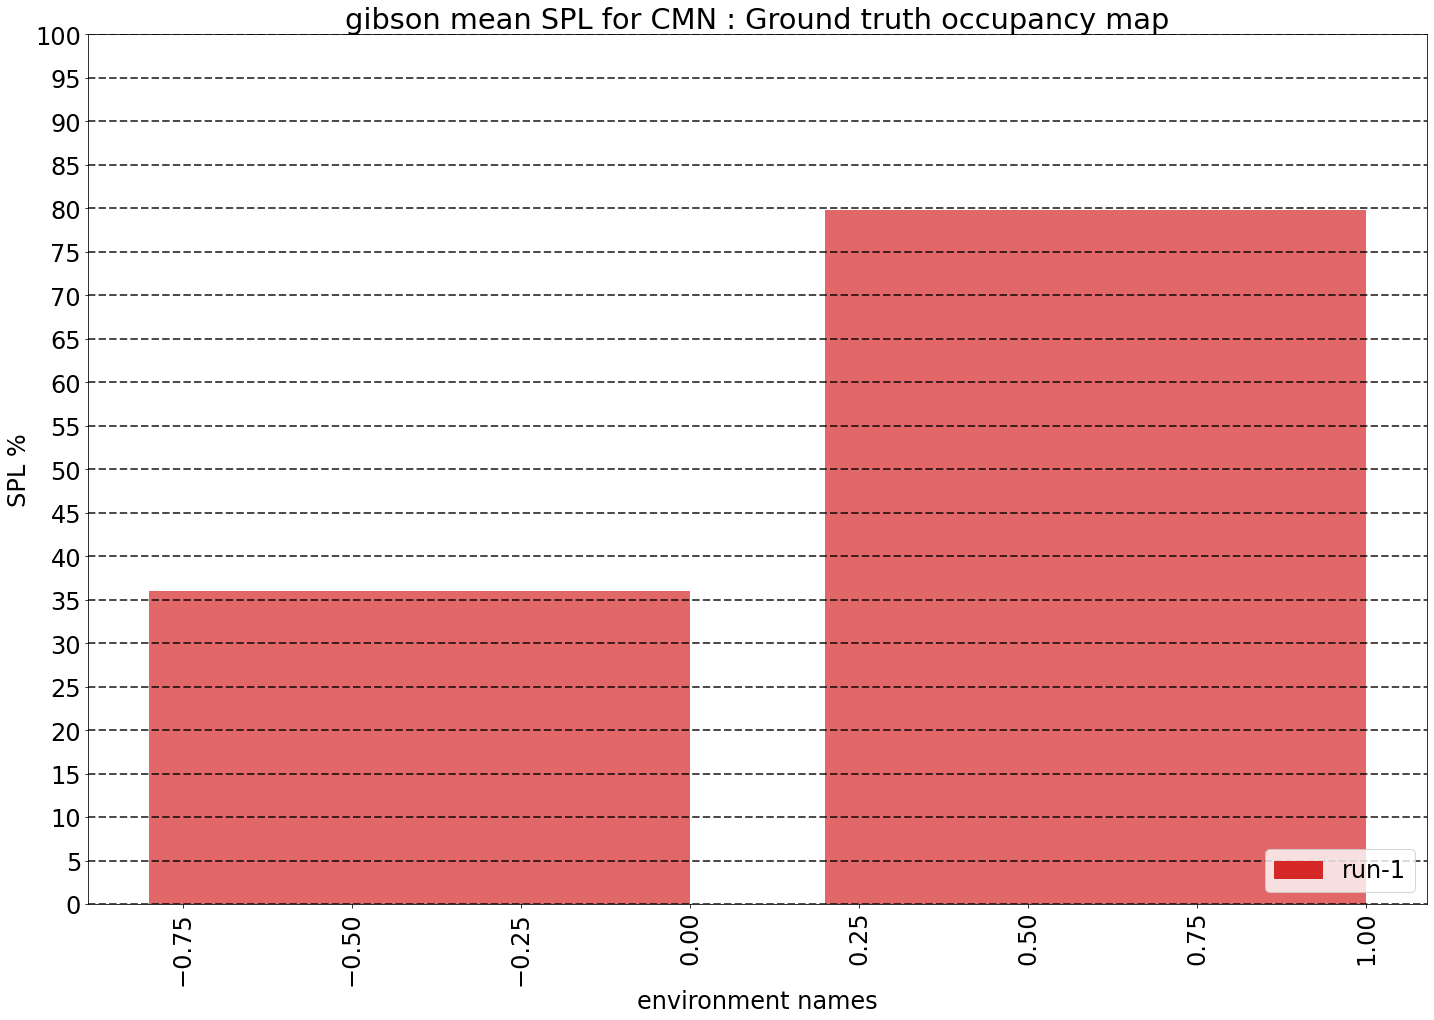

run-1 SPL mean value = 57.9 %, std = 21.9 %
Success rate : mean = 98.35, std = 0.0
SPL : mean = 57.9, std = 0.0


In [20]:
# load data
eval_mode = "tst"
dataset = "gibson"
obs_type = "color"
map_type = "pred"
rnd_seed = [0]
cmn_name_list = []
cmn_sr_list = []
cmn_spl_list = []
for seed in rnd_seed:
    name, sr, spl = load_log_file(f"./logs/11-10/cmn_obs=pred_map=gt_T=500/run_seed={seed}.log")
    cmn_name_list.append(name)
    cmn_sr_list.append(np.round(sr, decimals=1))
    cmn_spl_list.append(np.round(spl, decimals=1))
    
# For SR metric

print(cmn_sr_list)
print(cmn_spl_list)

# set figure configurations
figure_configs = {
    'title': f"{dataset} mean SR for HF : Ground truth occupancy map",
    'color': ["tab:red", "tab:olive", "tab:blue", 'tab:green'],
    "legend": ["run-1", "run-2", "run-3", "run-4"],
    'alpha': 0.7,
    "label_x": "environment names",
    "label_y": "success rate %",
    "ylim_min": 0,
    "ylim_max": 100,
    "metric": "SR",
    "font_size": 24
}

# plot the bar chart
plot_bar_chart(cmn_name_list,
               cmn_sr_list,
               figure_configs)

# For SPL metric


# set figure configurations
figure_configs = {
    'title': f"{dataset} mean SPL for CMN : Ground truth occupancy map",
    'color': ["tab:red", "tab:olive", "tab:blue", 'tab:green'],
    "legend": ["run-1", "run-2", "run-3", "run-4"],
    'alpha': 0.7,
    "label_x": "environment names",
    "label_y": "SPL %",
    "ylim_min": 0,
    "ylim_max": 100,
    "metric": "SPL",
    "font_size": 24
}

# plot the bar chart
plot_bar_chart(cmn_name_list,
               cmn_spl_list,
               figure_configs)


# compute the 4 run statistics
mean_sr_list = [np.mean(sr) for sr in cmn_sr_list]
print(f"Success rate : mean = {np.mean(mean_sr_list)}, std = {np.std(mean_sr_list)}")
mean_spl_list = [np.mean(spl) for spl in cmn_spl_list]
print(f"SPL : mean = {np.mean(mean_spl_list)}, std = {np.std(mean_spl_list)}")

###### 